Loaded 845 images with shape (224, 224, 3)
Loaded 845 labels with shape 11


/root/ML_3/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 837ms/step - accuracy: 0.2726 - loss: 2.4093 - val_accuracy: 0.3846 - val_loss: 1.8961
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 862ms/step - accuracy: 0.3912 - loss: 1.9191 - val_accuracy: 0.3846 - val_loss: 1.8038
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 960ms/step - accuracy: 0.4263 - loss: 1.7979 - val_accuracy: 0.3846 - val_loss: 1.7743
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 828ms/step - accuracy: 0.3773 - loss: 1.7721 - val_accuracy: 0.3846 - val_loss: 1.7137
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 943ms/step - accuracy: 0.4193 - loss: 1.6637 - val_accuracy: 0.3728 - val_loss: 1.6695
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 854ms/step - accuracy: 0.4324 - loss: 1.6298 - val_accuracy: 0.4260 - val_loss: 1.5956
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.4667 - loss: 1.5599 - val_accuracy: 0.4260 - val_loss: 1.5749
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5160 - loss: 1.4359 - val_accuracy: 

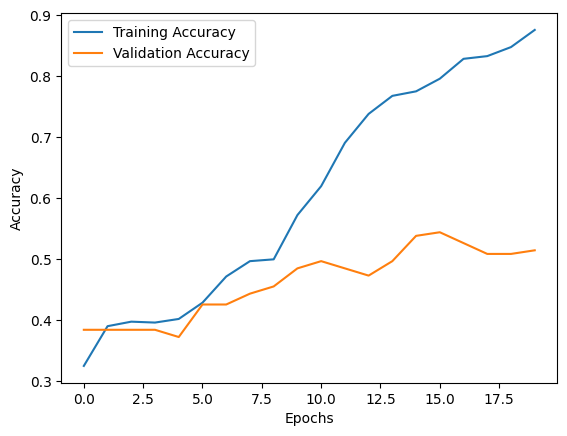

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step


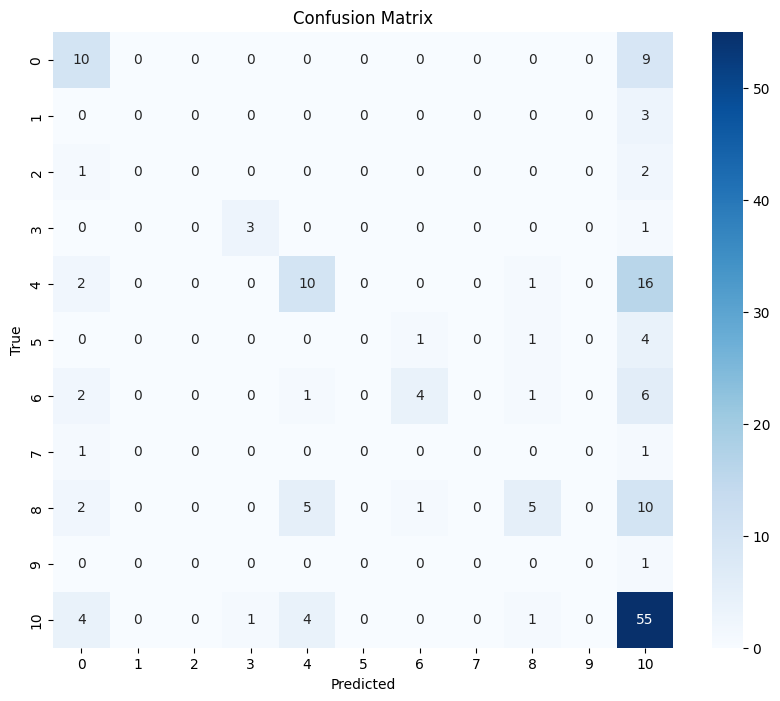

              precision    recall  f1-score   support

           0       0.45      0.53      0.49        19
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.75      0.75      0.75         4
           4       0.50      0.34      0.41        29
           5       0.00      0.00      0.00         6
           6       0.67      0.29      0.40        14
           7       0.00      0.00      0.00         2
           8       0.56      0.22      0.31        23
           9       0.00      0.00      0.00         1
          10       0.51      0.85      0.64        65

    accuracy                           0.51       169
   macro avg       0.31      0.27      0.27       169
weighted avg       0.48      0.51      0.46       169



/root/ML_3/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/ML_3/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/ML_3/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Loading the data
images = np.load('images.npy')
labels = np.load('labels.npy')

print(f'Loaded {images.shape[0]} images with shape {images.shape[1:]}')
print(f'Loaded {labels.shape[0]} labels with shape {labels.shape[1]}')

# Defining model
model = Sequential()

# Adding convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten & fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(labels.shape[1], activation='softmax'))  # Output layer with softmax for multi-class classification

# Compiling our model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Split dataset into training & validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Training
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Saving our trained model
# model.save('landmark_recognition_model.h5')

# Evaluating
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Plotting training history (won't run in terminal)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predicting the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))

***Now Lets train with Efficientnet model***

y_data.shape before any processing: (845, 11)
Number of classes: 2
y_data.shape after to_categorical: (845, 2)


/root/ML_3/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 680ms/step - accuracy: 0.5375 - loss: 0.9037 - val_accuracy: 0.9302 - val_loss: 0.6747 - learning_rate: 0.0010
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 679ms/step - accuracy: 0.7860 - loss: 0.5197 - val_accuracy: 0.9302 - val_loss: 0.4179 - learning_rate: 0.0010
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 617ms/step - accuracy: 0.8214 - loss: 0.5616 - val_accuracy: 0.9302 - val_loss: 0.2897 - learning_rate: 0.0010
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 683ms/step - accuracy: 0.8437 - loss: 0.4889 - val_accuracy: 0.9302 - val_loss: 0.3413 - learning_rate: 0.0010
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 647ms/step - accuracy: 0.8757 - loss: 0.4392 - val_accuracy: 0.9302 - val_loss: 0.2554 - learning_rate: 5.0000e-04
Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 27s 761ms/step - accuracy: 0.7402 - loss: 0.6899 - val_accuracy: 0.9302 - val_loss: 0.2576 - learning_rate: 1.0000e-04
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 796ms/step - accuracy: 0.7383 - loss: 0

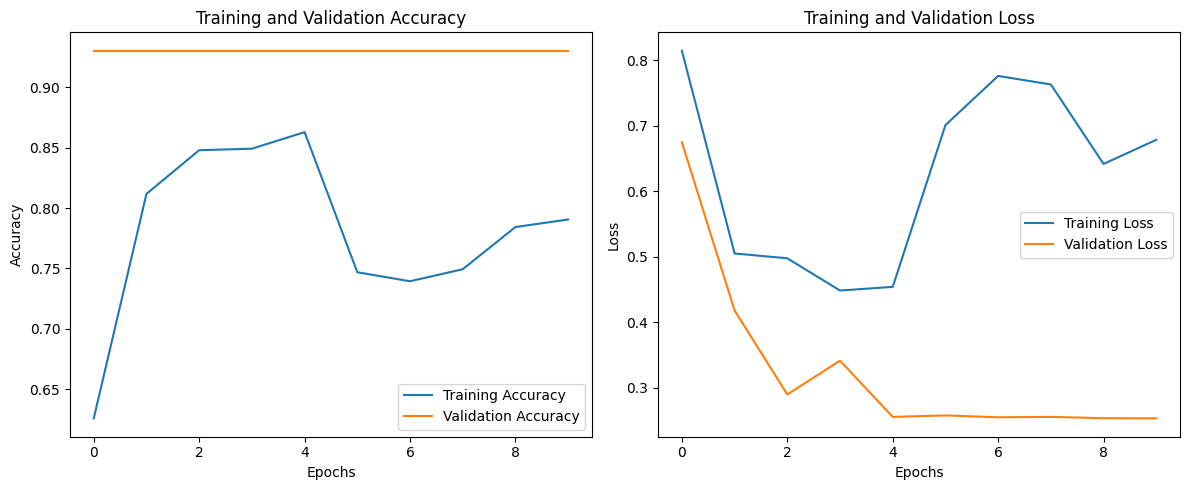

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


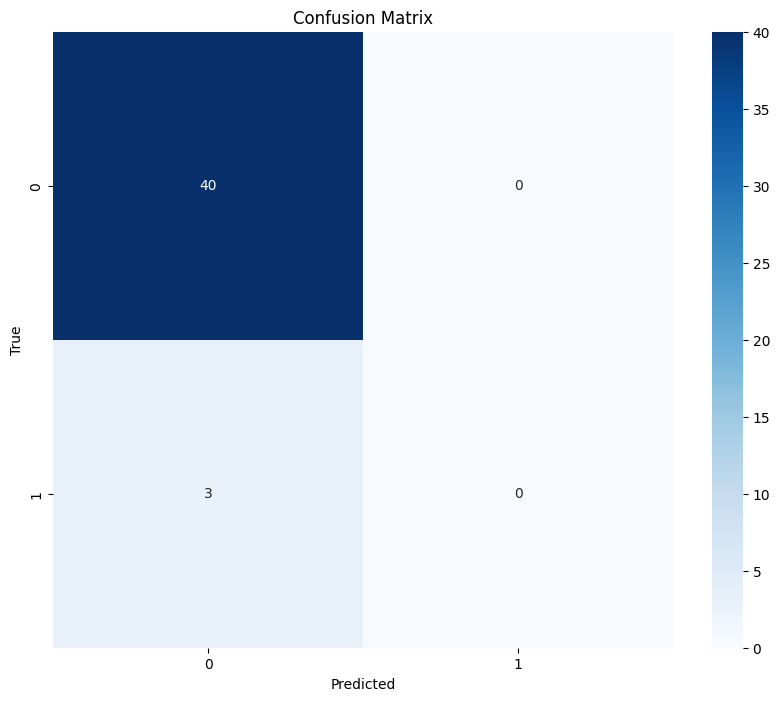

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       0.00      0.00      0.00         3

    accuracy                           0.93        43
   macro avg       0.47      0.50      0.48        43
weighted avg       0.87      0.93      0.90        43



/root/ML_3/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/ML_3/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/ML_3/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report

# Load training and validation datasets
X_data = np.load('images.npy')
y_data = np.load('labels.npy')

# Preprocess images
X_data = preprocess_input(X_data)

# Inspect labels
print("y_data.shape before any processing:", y_data.shape)

# Adjust labels
if len(y_data.shape) > 1 and y_data.shape[1] == 1:
    y_data = y_data.reshape(-1)
elif len(y_data.shape) > 1:
    y_data = y_data[:, 0]  # Take the first label per sample

# Ensure labels are integer encoded
y_data = y_data.astype(int)

# Check the number of classes
num_classes = np.max(y_data) + 1  # Assuming labels start from 0
print("Number of classes:", num_classes)

# One-hot encode the labels
y_data = to_categorical(y_data, num_classes=num_classes)
print("y_data.shape after to_categorical:", y_data.shape)

# Use 95% of the data for training and 5% for validation
split_index = int(0.95 * len(X_data))
X_train = X_data[:split_index]
y_train = y_data[:split_index]
X_val = X_data[split_index:]
y_val = y_data[split_index:]

# Data augmentation (less aggressive)
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen.fit(X_train)

# Load EfficientNetB0 base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback to reduce learning rate if the validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.00001)

# Train the model (initial training with frozen base)
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val), epochs=5, callbacks=[reduce_lr])

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training (fine-tuning)
history_fine = model.fit(train_datagen.flow(X_train, y_train, batch_size=32),
                         validation_data=(X_val, y_val), epochs=5, callbacks=[reduce_lr])

# Combine history
for key in history.history.keys():
    history.history[key] += history_fine.history[key]

# Save the final model
#model.save('landmark_recognition_efficientnet_improved.h5')

# Evaluating the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Plotting the training history to visualize how the training and validation accuracy evolve
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Predicting the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))
